## Preparando o ambiente

Instalando as bibliotecas necessárias

In [1]:
!pip install pandas
!pip install mpmath
!pip install pandoc

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Importando bibliotecas necessárias

In [2]:
import math
import os.path
import pandas as pd
import json
from string import *
from random import shuffle
import sys
from mpmath import *
import matplotlib.pyplot as plt

## Importando Planilha

In [3]:
df = pd.read_csv("USER_LOGS.csv")
UA = df["user_agent"]

In [4]:
XD = []
for i in UA:
    XD.append(i)

## Função para retirar caracteres especiais

In [5]:
def limpo(LR):
    i=0
    while (i < len (LR)):
        LR[i]=LR[i].replace("_"," ")
        LR[i]=LR[i].replace("'"," ")
        LR[i]=LR[i].replace("?"," ")
        LR[i]=LR[i].replace("$"," ")
        LR[i]=LR[i].replace("*"," ")
        LR[i]=LR[i].replace("%"," ")
        LR[i]=LR[i].replace("-"," ")
        LR[i]=LR[i].replace("<"," ")
        LR[i]=LR[i].replace(">"," ")
        LR[i]=LR[i].replace("'"," ")
        LR[i]=LR[i].replace('"'," ")
        LR[i]=LR[i].replace("!"," ")
        LR[i]=LR[i].replace("."," ")
        LR[i]=LR[i].replace(","," ")
        LR[i]=LR[i].replace("|"," ")
        LR[i]=LR[i].replace(":"," ")
        LR[i]=LR[i].replace("&"," ")
        LR[i]=LR[i].replace("("," ")
        LR[i]=LR[i].replace(")"," ")
        LR[i]=LR[i].replace("+"," ")
        LR[i]=LR[i].replace("#"," ")
        LR[i]=LR[i].replace("^"," ")
        LR[i]=LR[i].replace(";"," ")
        i+=1
    return LR

In [6]:
LXD=limpo(XD)

## Separando Sistemas Operacionais Mobile

In [7]:
# MODEL = {'ANDROID':33,'IPHONE':37}
LXD_MOBILE = []
MOBILE_MODELS = {}
for log in LXD:
    if "ANDROID" in log or "IPHONE" in log:
        LXD_MOBILE.append(log)
        if "ANDROID" in log:
            if log[31:58] not in MOBILE_MODELS.keys():
                MOBILE_MODELS[log[31:58]]=1
            else:
                MOBILE_MODELS[log[31:58]]=MOBILE_MODELS[log[31:58]]+1
        if "IPHONE" in log:
            if log[31:58] not in MOBILE_MODELS.keys():
                MOBILE_MODELS[log[31:58]]=1
            else:
                MOBILE_MODELS[log[31:58]]=MOBILE_MODELS[log[31:58]]+1


## Separando Versões do ANDROID

In [8]:
# MODEL = {'ANDROID':33,'IPHONE':37}
LXD_ANDROID_VERSIONS = []
ANDROID_VERSION = {}
for log in LXD:
    if "ANDROID" in log or "IPHONE" in log:
        LXD_ANDROID_VERSIONS.append(log)
        if "ANDROID" in log:
            if log[20:33] not in ANDROID_VERSION.keys():
                ANDROID_VERSION[log[20:33]]=1
            else:
                ANDROID_VERSION[log[20:33]]=ANDROID_VERSION[log[20:33]]+1


## Funções para limpar as versões ANDROID

In [9]:
def CLEAR_DROID(DROID_MODELS):
    NEW_DROID_MODELS = {}
    for i in DROID_MODELS:
        if "ANDROID" in i:
            NEW_DROID_MODELS[i]=DROID_MODELS[i]
        else:
            continue
    return NEW_DROID_MODELS

In [10]:
def CUT_DROID(DROID_MODELS):
    NEW_DROID_MODELS = {}
    for i in DROID_MODELS:
        OLD_i=i
        if i[-1] == ' ' or i[-1].isalpha():
            i = i[:-1]
            NEW_DROID_MODELS[i]=DROID_MODELS[OLD_i]
        elif i[1] == ' ' or i[0] == ' ':
            i = i[1:]
            NEW_DROID_MODELS[i]=DROID_MODELS[OLD_i]
        else:
            NEW_DROID_MODELS[i]=DROID_MODELS[OLD_i]
    return NEW_DROID_MODELS

In [11]:
ANV = CLEAR_DROID(ANDROID_VERSION)
ANV = CUT_DROID(ANV)
ANV = CUT_DROID(ANV)
ANV = CUT_DROID(ANV)
ANV = CUT_DROID(ANV)

## Função que corta espaços desnecessários

In [12]:
def CUT(MOBILE_MODELS_NEW):
    MOBILE_MODELS_NEW2 = {}
    for i in MOBILE_MODELS_NEW:
        i_OLD=i
        if 'BUI' in i:
            BUI_RM = 0
            for j in range(len(i)):
                if i[j]=="B" and i[j+1]=="U" and i[j+2]=="I":
                    BUI_RM = j
                    break
            MOBILE_MODELS_NEW2[i[:j]]=MOBILE_MODELS_NEW[i_OLD]
        elif i[0]==' ' or i[1]==' ':
            i = i[1:]
            MOBILE_MODELS_NEW2[i]=MOBILE_MODELS_NEW[i_OLD]
        elif i[-1]==' ':
            i = i[:-1]
            MOBILE_MODELS_NEW2[i]=MOBILE_MODELS_NEW[i_OLD]
        else:
            MOBILE_MODELS_NEW2[i]=MOBILE_MODELS_NEW[i_OLD]
    return MOBILE_MODELS_NEW2

## Função junta os Iphones em um único item

In [13]:
def IPHONE(dic):
    dic2 = {}
    count = 0
    for i in dic:
        if not "MAC" in i:
            dic2[i]=dic[i]
        else:
            count = count + 1
    dic2['IPHONE']=count
    return dic2

## Função que limpa o nome dos Modelos

In [14]:
def CLEAR_MODELS(MOBILE_MODELS):
    MOBILE_MODELS_NEW = {}
    for i in MOBILE_MODELS:
        i_OLD=i
        if i[0]==' ' or i[1]==' ':
            i = i[2:]
        if 'APP' in i:
            APP_RM = 0
            for j in range(len(i)):
                if i[j]=="A" and i[j+1]=="P" and i[j+2]=="P":
                    APP_RM = j
                    break
            MOBILE_MODELS_NEW[i[:j]]=MOBILE_MODELS[i_OLD]
        elif 'BUI' in i:
            BUI_RM = 0
            for j in range(len(i)):
                if i[j]=="B" and i[j+1]=="U" and i[j+2]=="I":
                    BUI_RM = j
                    break
            MOBILE_MODELS_NEW[i[:j]]=MOBILE_MODELS[i_OLD]
        elif 'GECKO' in i:
            continue
        else:
            MOBILE_MODELS_NEW[i]=MOBILE_MODELS[i_OLD]
    return MOBILE_MODELS_NEW

## Chamando as Funções

In [15]:
MMN = CLEAR_MODELS(MOBILE_MODELS)
MMN = CUT(MMN)
MMN = CUT(MMN)
MMN = CUT(MMN)
MMN = IPHONE(MMN)

## Convertendo de Dicionário para Data Frame e isolando os casos mais relevantes

In [16]:
df_DROID = pd.DataFrame(list(ANV.items()),columns = ['Versions','quant'])
df_DROID = df_DROID.sort_values('quant',ascending=False)
pd.set_option('max_rows', None)
df_DROID = df_DROID.loc[:8]
# top 5 = 5
# top 10 = 8
# top 20 = 17

In [17]:
df = pd.DataFrame(list(MMN.items()),columns = ['Models','quant'])
df = df.sort_values('quant',ascending=False)
pd.set_option('max_rows', None)
df = df.loc[:100]
# top 5 = 127
# top 10 = 100
# top 20 = 153

## Criando os Gráficos

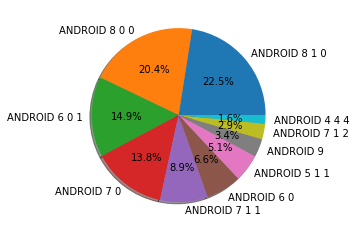

In [18]:
plote = plt.pie(df_DROID['quant'], labels=df_DROID['Versions'],  autopct='%1.1f%%',
        shadow=True)

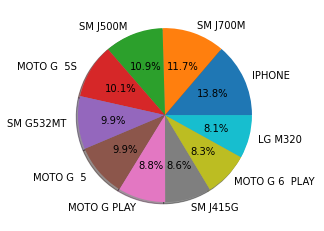

In [19]:
plote = plt.pie(df['quant'], labels=df['Models'],  autopct='%1.1f%%',
        shadow=True)

## Conclusão

As versões de **ANDROID** mais utilizadas são 6 *Android Marshmallow* , 7 *Android Nougat* , 8 *Android Oreo*
**Com uma resalva para os 5% que usa o 5 *Android Lollipop* por ter sido uma versão muito cheia de BUGS podem ter muitas bibliotecas descontinuadas**

Os aparelhos mais relevantes atualmente para o sistema Genius HOJE são **IPHONES em geral**, **MOTO 'G' e 'E'**, **Samsungs da linha 'J' e 'A'**, **LG linha 'K'**, **Xiaomi linha 'MI'**